In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-detection-fer/test/fearful/im292.png
/kaggle/input/emotion-detection-fer/test/fearful/im1022.png
/kaggle/input/emotion-detection-fer/test/fearful/im633.png
/kaggle/input/emotion-detection-fer/test/fearful/im934.png
/kaggle/input/emotion-detection-fer/test/fearful/im927.png
/kaggle/input/emotion-detection-fer/test/fearful/im966.png
/kaggle/input/emotion-detection-fer/test/fearful/im662.png
/kaggle/input/emotion-detection-fer/test/fearful/im648.png
/kaggle/input/emotion-detection-fer/test/fearful/im178.png
/kaggle/input/emotion-detection-fer/test/fearful/im817.png
/kaggle/input/emotion-detection-fer/test/fearful/im308.png
/kaggle/input/emotion-detection-fer/test/fearful/im623.png
/kaggle/input/emotion-detection-fer/test/fearful/im651.png
/kaggle/input/emotion-detection-fer/test/fearful/im72.png
/kaggle/input/emotion-detection-fer/test/fearful/im229.png
/kaggle/input/emotion-detection-fer/test/fearful/im444.png
/kaggle/input/emotion-detection-fer/test/fearful/im415.p

In [ ]:
# Text Emotion Data Preparation
# 'anger', 'fear', 'joy', 'sadness', 'surprise'

In [5]:
# reading text file
train_data = ""
with open('/kaggle/input/emotions-dataset-for-nlp/train.txt', 'r') as train_file: 
    train_data = train_file.read()

In [6]:
train_data = train_data.split('\n')
train_data[:5]

['i didnt feel humiliated;sadness',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness',
 'im grabbing a minute to post i feel greedy wrong;anger',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love',
 'i am feeling grouchy;anger']

In [7]:
train_data[0].split(';')

['i didnt feel humiliated', 'sadness']

In [8]:
train_set = {
    'text': [], 
    'tag':[]
}
for data in train_data: 
#     print('do')
    
    row = data.split(';')
    if len(row) != 2:
        print(row)
    else:
        txt, emo  = data.split(';')
        train_set['text'].append(txt)
        train_set['tag'].append(emo)

['']


In [9]:
pd.DataFrame(train_set)

,text,tag
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [12]:
# data laoding with a single function 
def load_dataset(path): 
    train_data = ""
    with open(path, 'r') as train_file: 
        train_data = train_file.read()
    
    train_data = train_data.split('\n')
    train_set = {
    'text': [], 
    'tag':[]
    }
    for data in train_data: 
    #     print('do')

        row = data.split(';')
        if len(row) != 2:
            print(row)
        else:
            txt, emo  = data.split(';')
            train_set['text'].append(txt)
            train_set['tag'].append(emo)
    
    return pd.DataFrame(train_set)

In [11]:
test_df = load_dataset('/kaggle/input/emotions-dataset-for-nlp/test.txt')
train_df = load_dataset('/kaggle/input/emotions-dataset-for-nlp/train.txt')
val_df = load_dataset('/kaggle/input/emotions-dataset-for-nlp/val.txt')

['']
['']
['']


In [13]:
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)

(16000, 2)
(2000, 2)
(2000, 2)


In [14]:
train_df.head(3)

,text,tag
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger


In [15]:
dataset = pd.concat([train_df, test_df, val_df], ignore_index='ignore')
dataset

,text,tag
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness
19996,i constantly worry about their fight against n...,joy
19997,i feel its important to share this info for th...,joy
19998,i truly feel that if you are passionate enough...,joy


In [16]:
dataset.shape

(20000, 2)

In [23]:
dataset = dataset[dataset['tag'] != 'love']
dataset.tag.unique()

array(['sadness', 'anger', 'surprise', 'fear', 'joy'], dtype=object)

In [28]:
# dataset

In [17]:
dataset.text.sample(3)

17703    i always feel that love is something much vast...
13411    i feel reluctant to talk about an issue which ...
9479     i feel uptight is it any wonder i dont know wh...
Name: text, dtype: object

In [18]:
dataset.text[3]

'i am ever feeling nostalgic about the fireplace i will know that it is still on the property'

In [19]:
dataset.tag.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
# 'anger', 'fear', 'joy', 'sadness', 'surprise'

In [24]:
# limiting classsification score (sadness, anger, surpose, joy)
# Data Cleaning ....
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string 

stemmer = PorterStemmer()

In [30]:
# token word
sample = dataset.text[4].split(' ')

In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
# stem word
stem_sample = [stemmer.stem(samp.lower()) for samp in sample if samp not in string.punctuation]
stem_sample[:6]

['i', 'am', 'feel', 'grouchi']

In [33]:
def clean_text(text):
    # stem word
    # token word
    sample = text.split(' ')
    stem_sample = [stemmer.stem(samp.lower()) for samp in sample if samp not in string.punctuation]
    return ' '.join(stem_sample)

dataset['clean_text'] = dataset.text.apply(lambda x: clean_text(x))
dataset.head()

,text,tag,clean_text
0,i didnt feel humiliated,sadness,i didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feel so hopeless to so damn hope...
2,im grabbing a minute to post i feel greedy wrong,anger,im grab a minut to post i feel greedi wrong
4,i am feeling grouchy,anger,i am feel grouchi
5,ive been feeling a little burdened lately wasn...,sadness,ive been feel a littl burden late wasnt sure w...


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18359 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        18359 non-null  object
 1   tag         18359 non-null  object
 2   clean_text  18359 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [35]:
dataset['tag'] = dataset.tag.astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18359 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   text        18359 non-null  object  
 1   tag         18359 non-null  category
 2   clean_text  18359 non-null  object  
dtypes: category(1), object(2)
memory usage: 964.5+ KB


In [36]:
dataset['label'] = dataset.tag.cat.codes
dataset.sample(4)

,text,tag,clean_text,label
18089,i didnt feel rushed,anger,i didnt feel rush,0
17147,i have spent of my waking hours enjoying the f...,joy,i have spent of my wake hour enjoy the freedom...,2
14003,i will never make him feel disliked and like h...,sadness,i will never make him feel dislik and like he ...,3
6199,i wondered if i would feel a bit lost when i g...,sadness,i wonder if i would feel a bit lost when i got...,3


In [37]:
dataset.tag.cat.categories

Index(['anger', 'fear', 'joy', 'sadness', 'surprise'], dtype='object')

In [38]:
dataset.tag.cat.categories

Index(['anger', 'fear', 'joy', 'sadness', 'surprise'], dtype='object')

In [39]:
text_emo_mapper =  dict(zip(np.arange(len(dataset.tag.cat.categories)), dataset.tag.cat.categories))
text_emo_mapper

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness', 4: 'surprise'}

In [40]:
final_data = dataset[['clean_text', 'label']]
final_data.head(3)

,clean_text,label
0,i didnt feel humili,3
1,i can go from feel so hopeless to so damn hope...,3
2,im grab a minut to post i feel greedi wrong,0


In [41]:
import warnings

warnings.filterwarnings('ignore')

In [42]:
final_data['tok'] = final_data.clean_text.apply(lambda x:x.split(' '))
final_data.head(4)

,clean_text,label,tok
0,i didnt feel humili,3,"[i, didnt, feel, humili]"
1,i can go from feel so hopeless to so damn hope...,3,"[i, can, go, from, feel, so, hopeless, to, so,..."
2,im grab a minut to post i feel greedi wrong,0,"[im, grab, a, minut, to, post, i, feel, greedi..."
4,i am feel grouchi,0,"[i, am, feel, grouchi]"


In [43]:
final_data['lenght'] = final_data['tok'].apply(lambda x:len(x))
final_data.head()

,clean_text,label,tok,lenght
0,i didnt feel humili,3,"[i, didnt, feel, humili]",4
1,i can go from feel so hopeless to so damn hope...,3,"[i, can, go, from, feel, so, hopeless, to, so,...",21
2,im grab a minut to post i feel greedi wrong,0,"[im, grab, a, minut, to, post, i, feel, greedi...",10
4,i am feel grouchi,0,"[i, am, feel, grouchi]",4
5,ive been feel a littl burden late wasnt sure w...,3,"[ive, been, feel, a, littl, burden, late, wasn...",12


In [44]:
final_data.lenght.max()

66

In [45]:
# feature extraction using word embedding 
import gensim
from sklearn import model_selection

In [46]:
emo_vec = gensim.models.Word2Vec(window=10, vector_size=300, min_count=2, workers=4)
emo_vec

In [47]:
# training word embedding... 
emo_vec.build_vocab(final_data.tok, progress_per=100)
emo_vec.train(final_data.tok, total_examples=emo_vec.corpus_count, epochs=emo_vec.epochs)

(1148456, 1744385)

In [48]:
emo_vec.save('emovector.h5')
print('modelsaved')

modelsaved


In [49]:
vocab_size = len(emo_vec.wv.key_to_index.keys())
print('vocal size:',  vocab_size)

vocal size: 5826


In [50]:
emo_vec.wv.most_similar('sad')

[('scare', 0.9878601431846619),
 ('regret', 0.9838688969612122),
 ('rebelli', 0.9824812412261963),
 ('petti', 0.9822118282318115),
 ('nervou', 0.9817584156990051),
 ('shitti', 0.9801936745643616),
 ('uncertain', 0.9801401495933533),
 ('rotten', 0.9792745113372803),
 ('worthless', 0.9790396094322205),
 ('pathet', 0.9785698056221008)]

In [51]:
# data spliting 
X_emo, y_emo = final_data.clean_text, final_data.label
# X_train, X_test, y_train, y_test  = model_selection.train_test_split(X_emo, y_emo, test_size=.20)

In [52]:
# vectorizaing text and generating word embedding .. 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow

2024-09-24 18:07:50.289670: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 18:07:50.289771: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 18:07:50.429245: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [53]:
# vectorizing text
# tokenize
tokenizer = Tokenizer(num_words=vocab_size + 1)
# create vocab (dictionary of word)
tokenizer.fit_on_texts(X_emo)
tokenizer_size = len(tokenizer.word_index)
tokenizer_size

11101

In [54]:
import joblib

joblib.dump(tokenizer, 'tokenizer.jb')

['tokenizer.jb']

In [56]:
# reloading tokenizer 
tkk  = joblib.load('/kaggle/working/tokenizer.jb')
# tkk.word_index

In [57]:
# converting the vocabulary to sequence 
sequence = tokenizer.texts_to_sequences(X_emo)
sequence[:2]

[[1, 142, 2, 594],
 [1,
  40,
  46,
  62,
  2,
  13,
  497,
  4,
  13,
  783,
  149,
  29,
  62,
  16,
  129,
  158,
  78,
  262,
  3,
  21,
  1275]]

In [58]:
max_lenght = final_data.lenght.mean()
print('Max String Lenght: ', max_lenght)

Max String Lenght:  19.003050275069448


In [59]:
# pad the sequence
pad_seq = pad_sequences(sequence, maxlen=20,padding='post' )
pad_seq[:4]

array([[   1,  142,    2,  594,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  40,   46,   62,    2,   13,  497,    4,   13,  783,  149,   29,
          62,   16,  129,  158,   78,  262,    3,   21, 1275],
       [  15, 1376,    6,  573,    4,  199,    1,    2,  508,  273,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,   22,    2,  971,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [60]:
X_train, X_test, y_train, y_test  = model_selection.train_test_split(pad_seq, y_emo, test_size=.30)
X_train.shape

(12851, 20)

In [61]:
# embedding matrix 
embedding_matrix = np.zeros((tokenizer_size, 300))
embedding_matrix.shape

(11101, 300)

In [62]:
eb_matrix = np.zeros((tokenizer_size, 300))
eb_matrix.shape

(11101, 300)

In [64]:
# tokenizer.index_word.items()
'i' in emo_vec.wv.index_to_key

True

In [65]:
for index, word in tokenizer.index_word.items(): 
    if word in emo_vec.wv.index_to_key: 
        eb_matrix[index-1] = emo_vec.wv[word] 
    else: 
        pass

In [ ]:
# eb_matrix[1]

In [66]:
emo_vec.wv['love'].shape

(300,)

In [67]:
# generate contextualize embedding ... 
# vocab = model.wv.key_to_index
vocab = emo_vec.wv.key_to_index
total_vocab = tokenizer_size
for word, index in tokenizer.word_index.items():
#     print(word, (index-1))
    if index < vocab_size: 
        if word in emo_vec.wv.index_to_key:
            embedding_matrix[index] = emo_vec.wv[word]
#             print(len(weight_matrix[index-1]))
        else: 
            embedding_matrix[index] = np.zeros(100)

print(embedding_matrix.shape)
print('weighted matrix complete....')
        
embedding_matrix[1]

(11101, 300)
weighted matrix complete....


array([-0.15998803,  0.2211837 , -0.01550745,  0.22912514, -0.11426095,
       -0.39343825,  0.27639219,  0.57804471, -0.53215176, -0.50076556,
        0.30065873, -0.34705284, -0.29215094,  0.28338966,  0.16677669,
       -0.08739977,  0.55134654, -0.23718129, -0.15971543, -0.76682532,
        0.16363908,  0.20993082,  0.33335131,  0.04506293,  0.41831025,
        0.06193499, -0.64705127,  0.25881591, -0.89604014, -0.93511587,
        0.32135242, -0.38997465,  0.38275832, -0.61815798, -0.57768625,
        0.4561201 ,  0.31004304, -0.66762102, -0.17752039, -0.02407538,
       -0.43928981, -0.07523484, -0.4879747 , -0.65132809,  0.19515176,
        0.29065284, -0.32860702,  0.6649282 ,  0.21431655,  0.48677632,
       -0.08368607,  0.31997353, -0.25081274,  0.00263183,  0.39672464,
       -0.26099807,  0.25356618, -0.37589169,  0.00130872,  0.26758245,
       -0.02396939, -0.11505974,  0.08639916,  0.01446438, -0.24375477,
        0.57760543, -0.42306855,  0.35657364, -0.09937239, -0.42

In [68]:
# emo_vec.wv.key_to_index.keys()

In [69]:
emo_vec.wv[1] == eb_matrix[1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [70]:
vocab_size = len(tokenizer.word_index)
dimension  = 300
pad_length = max_lenght+1
classes    = len(final_data.label.unique())

print(vocab_size)
print(dimension)
print(pad_length)
print(classes)



11101
300
20.003050275069448
5


In [71]:
# lstm model using unsupervise word embedding 
import tensorflow as tf 
# em_layer.embeddings
import keras

In [72]:
final_data.label.unique()

array([3, 0, 4, 1, 2], dtype=int8)

In [73]:
X_train

array([[  1,   2, 425, ...,   0,   0,   0],
       [  1,  22, 302, ..., 277,   0,   0],
       [  1, 188,   2, ...,   0,   0,   0],
       ...,
       [  1,   2,  12, ...,   0,   0,   0],
       [  1,   2,  12, ...,   0,   0,   0],
       [  1,   2,  12, ...,   0,   0,   0]], dtype=int32)

In [86]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense

# input layer
input_layer = Input(shape=(None,), dtype='int32', name='input_layer')

# Embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=dimension, weights=[eb_matrix], input_length=pad_length, trainable=True,name='embedding_layer')(input_layer)

# Dense Layer
lstm_layer = tf.keras.layers.Bidirectional(LSTM(256, name='lstm_layer', return_sequences=True))(embedding_layer)
lstm_layer2 = tf.keras.layers.Bidirectional(LSTM(128, name='lstm_layer2', return_sequences=True))(lstm_layer)
lstm_layer3 = LSTM(64, name='lstm_layer3')(lstm_layer2)

# dense
dense_lstm = Dense(32, activation='relu', name='dense_lstm')(lstm_layer3)
output_layer = Dense(5, activation='softmax', name='output_layer')(dense_lstm)

# functional model
emocaptcha = Model(inputs=input_layer, outputs=output_layer, name='model_with_pretrained_embeddings')

# Compile the model
emocaptcha.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
emocaptcha.summary()

Model: "model_with_pretrained_embeddings"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Embedding)     │ (None, None, 300)      │     3,330,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, None, 512)      │     1,140,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, None, 256)      │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer3 (LSTM)              │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_lstm (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,211,841 (19.88 MB)

 Trainable params: 5,211,841 (19.88 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
emocaptcha.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.3593 - loss: 1.4157 - val_accuracy: 0.3725 - val_loss: 1.4094
Epoch 2/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.4416 - loss: 1.3006 - val_accuracy: 0.7464 - val_loss: 0.7181
Epoch 3/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7936 - loss: 0.5683 - val_accuracy: 0.8266 - val_loss: 0.4975
Epoch 4/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8998 - loss: 0.2978 - val_accuracy: 0.8419 - val_loss: 0.4636
Epoch 5/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9363 - loss: 0.1948 - val_accuracy: 0.8430 - val_loss: 0.5819
Epoch 6/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9585 - loss: 0.1253 - val_accuracy: 0.8462 - val_loss: 0.5992
Epoch 7/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9669 - loss: 0.1015 - val_accuracy: 0.8386 - val_loss: 0.6434
Epoch 8/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9753 - loss: 0.0748 - val_ac

In [88]:
emocaptcha.save('emocaptch_text_v2.h5')
print('model saved')

model saved


In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [90]:
text_emo_mapper

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness', 4: 'surprise'}

In [91]:
val  = list(text_emo_mapper.values())
val

['anger', 'fear', 'joy', 'sadness', 'surprise']

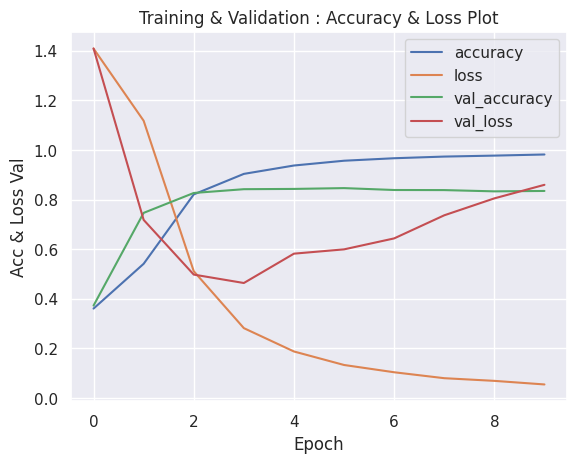

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
history = emocaptcha.history.history

sn.set()

pd.DataFrame(history).plot()
plt.title('Training & Validation : Accuracy & Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Acc & Loss Val')
plt.show()

173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       779
           1       0.70      0.81      0.75       727
           2       0.88      0.88      0.88      2052
           3       0.87      0.87      0.87      1722
           4       0.72      0.51      0.60       228

    accuracy                           0.83      5508
   macro avg       0.80      0.77      0.78      5508
weighted avg       0.84      0.83      0.83      5508

Axes(0.125,0.11;0.62x0.77)
==================  ALL CLASS REPORT ==================
0.8347857661583151
0.8362450967291446
0.8347857661583151
0.8340014339848898


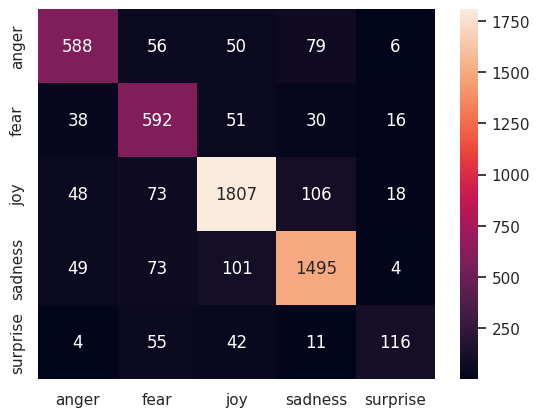

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

prediction = emocaptcha.predict(X_test)
final_pred = [np.argmax(pre) for pre in prediction]

# classification report 
text_report = classification_report(y_test, final_pred)
text_conf = confusion_matrix(y_test, final_pred)
text_acc = accuracy_score(y_test, final_pred)
text_precision = precision_score(y_test, final_pred, average='weighted')
text_recall = recall_score(y_test, final_pred, average='weighted')
text_f1_score  = f1_score(y_test, final_pred, average='weighted')


print(text_report)
print(sn.heatmap(text_conf, fmt='d', annot=True, xticklabels=text_emo_mapper.values(), yticklabels=text_emo_mapper.values()))

print('==================  ALL CLASS REPORT ==================')
print(text_acc)
print(text_precision)
print(text_recall)
print(text_f1_score)

### Model Usage

In [94]:
from tensorflow.keras.models import load_model
import joblib
import os

root_path = '/kaggle/working/'
# /kaggle/working/


text_emo_path = os.path.join(root_path, 'emocaptch_text_v2.h5')
emotion_text_model = load_model(text_emo_path)
emotion_text_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
emotion_text_model.summary()

Model: "model_with_pretrained_embeddings"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Embedding)     │ (None, None, 300)      │     3,330,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, None, 512)      │     1,140,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, None, 256)      │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer3 (LSTM)              │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_lstm (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,211,841 (19.88 MB)

 Trainable params: 5,211,841 (19.88 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# process raw taxt from user 
token_path  = os.path.join(root_path, 'tokenizer.jb')
load_tokenizer = joblib.load(token_path)

In [110]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

input_sequence = load_tokenizer.texts_to_sequences(['the! love ? the train is confortable'])
input_pad_sequence = pad_sequences(input_sequence, maxlen=20,padding='post')
input_pad_sequence

array([[  5,  77,   5, 738,  21,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0]], dtype=int32)

In [111]:
text_prediction = emotion_text_model.predict(input_pad_sequence)
text_emotion = [np.argmax(pre) for pre in text_prediction]
text_emotion
text_emo_mapper[text_emotion[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'joy'

In [100]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# building a prediction function ... 

root_path = '/kaggle/working/'

# preload the model and compile... 
def load_emocaptch_text_model():
    text_emo_path = os.path.join(root_path, 'emocaptch_text_v2.h5')
    emotion_text_model = load_model(text_emo_path)
    emotion_text_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    token_path  = os.path.join(root_path, 'tokenizer.jb')
    load_tokenizer = joblib.load(token_path)
    
    return emotion_text_model , load_tokenizer
    
# load tensorflow tokenizer from joblib and convert text to sequence... .
def preprocess_text(input_text, load_tokenizer):
    input_sequence = load_tokenizer.texts_to_sequences([input_text])
    input_pad_sequence = pad_sequences(input_sequence, maxlen=20,padding='post')
    return input_pad_sequence

# make prediction
def predict_emotion_from_text(input_pad_sequence):
    text_prediction = emotion_text_model.predict(input_pad_sequence)
    text_emotion = [np.argmax(pre) for pre in text_prediction]
    text_emotion
    output = text_emo_mapper[text_emotion[0]]
    return output


In [101]:
model, tokenizer = load_emocaptch_text_model()

In [104]:
text  =  input('Enter text:')
text_token = preprocess_text(text, tokenizer)
emotion = predict_emotion_from_text(text_token)
emotion

Enter text: waooo!! this is a nice post


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'anger'

## START IMAGE PROCESSING ..... 

In [112]:
import pathlib
import warnings
import glob
import PIL
import cv2 as cv

In [113]:
# train_url = 'emotion/'
url = '/kaggle/input/emotion-detection-fer'
win_path = pathlib.Path(url)
win_path

train_path = list(win_path.glob('train/*/*.*'))
print(train_path[:5])

test_path = list(win_path.glob('test/*/*.*'))
test_path[:5]

[PosixPath('/kaggle/input/emotion-detection-fer/train/fearful/im1375.png'), PosixPath('/kaggle/input/emotion-detection-fer/train/fearful/im3465.png'), PosixPath('/kaggle/input/emotion-detection-fer/train/fearful/im3209.png'), PosixPath('/kaggle/input/emotion-detection-fer/train/fearful/im1444.png'), PosixPath('/kaggle/input/emotion-detection-fer/train/fearful/im1029.png')]


[PosixPath('/kaggle/input/emotion-detection-fer/test/fearful/im292.png'),
 PosixPath('/kaggle/input/emotion-detection-fer/test/fearful/im1022.png'),
 PosixPath('/kaggle/input/emotion-detection-fer/test/fearful/im633.png'),
 PosixPath('/kaggle/input/emotion-detection-fer/test/fearful/im934.png'),
 PosixPath('/kaggle/input/emotion-detection-fer/test/fearful/im927.png')]

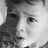

In [114]:
# size
len(train_path)
len(test_path)
PIL.Image.open(str(train_path[0]))

In [115]:
sample_img = cv.imread(str(train_path[0]))
sample_img

array([[[161, 161, 161],
        [167, 167, 167],
        [162, 162, 162],
        ...,
        [159, 159, 159],
        [169, 169, 169],
        [156, 156, 156]],

       [[166, 166, 166],
        [167, 167, 167],
        [166, 166, 166],
        ...,
        [155, 155, 155],
        [173, 173, 173],
        [159, 159, 159]],

       [[173, 173, 173],
        [174, 174, 174],
        [165, 165, 165],
        ...,
        [157, 157, 157],
        [186, 186, 186],
        [166, 166, 166]],

       ...,

       [[ 57,  57,  57],
        [ 44,  44,  44],
        [ 96,  96,  96],
        ...,
        [108, 108, 108],
        [124, 124, 124],
        [114, 114, 114]],

       [[ 50,  50,  50],
        [ 51,  51,  51],
        [ 85,  85,  85],
        ...,
        [123, 123, 123],
        [119, 119, 119],
        [104, 104, 104]],

       [[ 54,  54,  54],
        [ 80,  80,  80],
        [121, 121, 121],
        ...,
        [117, 117, 117],
        [114, 114, 114],
        [ 99,  99,  99]]

In [116]:
# 'anger', 'fear', 'joy', 'sadness', 'surprise'

In [ ]:
# reading actual images

train_dict = {
    'angry': list(win_path.glob('train/angry/*.*')), 
#     'disgusted': list(win_path.glob('train/disgusted/*.*')), 
    'fearful': list(win_path.glob('train/fearful/*.*')), 
    'happy': list(win_path.glob('train/happy/*.*')), 
#     'neutral': list(win_path.glob('train/neutral/*.*')), 
    'sad': list(win_path.glob('train/sad/*.*')), 
    'surprised': list(win_path.glob('train/surprised/*.*'))
}

lbl_dict = {
    'angry': 0, 
#     'disgusted': 1,
    'fearful': 1,
    'happy': 2,
#     'neutral': 3,
    'sad': 3,
    'surprised': 4
}


test_dict = {
    'angry': list(win_path.glob('train/angry/*.*')), 
#     'disgusted': list(win_path.glob('train/disgusted/*.*')), 
    'fearful': list(win_path.glob('train/fearful/*.*')), 
    'happy': list(win_path.glob('train/happy/*.*')), 
#     'neutral': list(win_path.glob('train/neutral/*.*')), 
    'sad': list(win_path.glob('train/sad/*.*')), 
    'surprised': list(win_path.glob('train/surprised/*.*'))
}

lbl_dict = {
       'angry': 0, 
#     'disgusted': 1,
    'fearful': 1,
    'happy': 2,
#     'neutral': 4,
    'sad': 3,
    'surprised': 4
}

train_image_dict = {
    'angry': [], 
#     'disgusted': [], 
    'fearful': [], 
    'happy': [], 
#     'neutral': [], 
    'sad': [], 
    'surprised': []
}



test_image_dict = {
    'angry': [], 
#     'disgusted': [], 
    'fearful': [], 
    'happy': [], 
#     'neutral': [], 
    'sad': [], 
    'surprised': []
}

NameError: name 'win_path' is not defined

In [119]:
# reading all images using the dictionary format 
train_x = []
train_y = []
for clas, imgs in train_dict.items():
    for img in imgs: 
        read_img = cv.imread(str(img))
        train_x.append(read_img)
        train_image_dict[clas].append(read_img)
        # storing lable 
        train_y.append(lbl_dict[clas])
print('data loading complete')

data loading complete


In [120]:
# reading all images using the dictionary format (VALIDATION DATA)
test_x = []
test_y = []
for clas, imgs in test_dict.items():
    for img in imgs: 
        read_img = cv.imread(str(img))
        test_x.append(read_img)
        test_image_dict[clas].append(read_img)
        # storing lable 
        test_y.append(lbl_dict[clas])
print('test data loading complete')


for img in train_x[:10]:
    print(img.shape)

test data loading complete
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)


In [121]:
import numpy as np 

# conterting to numpy array
xtrain = np.array(train_x)
ytrain = np.array(train_y)

# xploring images.. 
sample_image = xtrain[2]
sample_image.shape

(48, 48, 3)

In [122]:
# label convertion 
label_converter = {0:'angry', 
                   # 1:'disgusted',
                   1:'fearful', 
                   2:'happy', 
                   3:'sad', 
                   4:'surprised'}
label_converter

{0: 'angry', 1: 'disgusted', 2: 'happy', 3: 'sad', 4: 'surprised'}

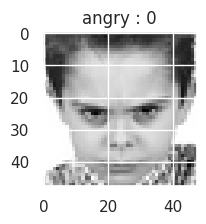

In [124]:
import matplotlib.pyplot as plt

def plot_image(index): 
    plt.figure(figsize=(2, 2))
    plt.imshow(xtrain[index])
    plt.title(f'{label_converter[ytrain[index]]} : {ytrain[index]}')
    plt.show()

plot_image(13)

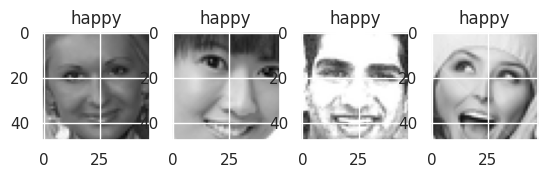

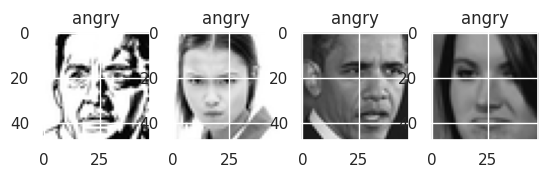

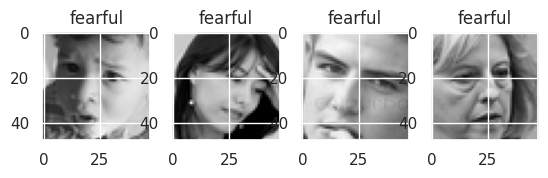

In [125]:
def plot_subplot(axis, samples, clas , index): 
    # plt.figure(figsize=(10, 10))
    axis.imshow(samples[clas][index])
    axis.set_title(f'{clas}')
    
    
# subplot
fig, ax = plt.subplots(ncols=4)
for index in range(4):
    plot_subplot(ax[index], train_image_dict,  'happy', index)
    

fig, ax = plt.subplots(ncols=4)
for index in range(4):
    plot_subplot(ax[index], train_image_dict,  'angry', index)
    

fig, ax = plt.subplots(ncols=4)
for index in range(4):
    plot_subplot(ax[index], train_image_dict,  'fearful', index)
    

# fig, ax = plt.subplots(ncols=4)
# for index in range(4):
#     plot_subplot(ax[index], train_image_dict,  'neutral', index)

In [126]:
####.. basic exploration, transformation, and 
plot_data = {
         'angry': 0, 
#     'disgusted': 1,
    'fearful': 1,
    'happy': 2,
#     'neutral': 4,
    'sad': 3,
    'surprised': 4
}
for clas, image in train_image_dict.items(): 
    print(clas, len(image))
    plot_data[clas] = len(image)

angry 3995
fearful 4097
happy 7215
sad 4830
surprised 3171


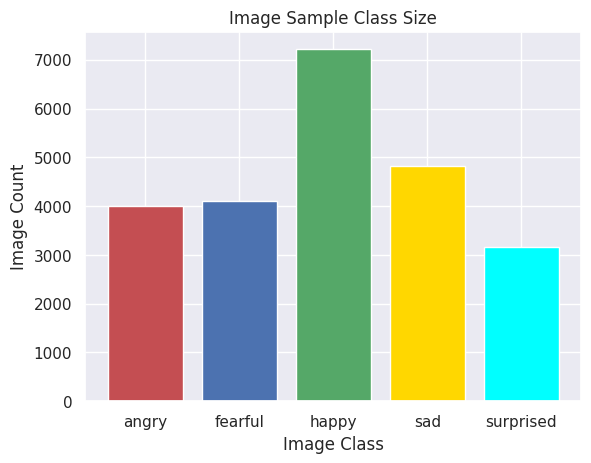

In [127]:
plt.bar(plot_data.keys(), plot_data.values(), color=['r', 'b', 'g', 'gold', 'cyan'])
plt.title('Image Sample Class Size')
plt.ylabel('Image Count')
plt.xlabel('Image Class')
plt.show()

In [128]:
# scalling the image 
xtrain = xtrain / 255
xtrain[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.02745098, 0.02745098, 0.02745098],
        [0.02352941, 0.02352941, 0.02352941],
        [0.03529412, 0.03529412, 0.03529412]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.03137255, 0.03137255, 0.03137255],
        [0.01176471, 0.01176471, 0.01176471],
        [0.08627451, 0.08627451, 0.08627451]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.02745098, 0.02745098, 0.02745098],
        [0.02745098, 0.02745098, 0.02745098],
        [0.05490196, 0.05490196, 0.05490196]],

       ...,

       [[0.70196078, 0.70196078, 0.70196078],
        [0.96078431, 0.96078431, 0.96078431],
        [1.        , 1

In [131]:
# scalling the image 
xtest = np.array(test_x)
xtest = xtest / 255

In [132]:
ytest = np.array(test_y)
ytrain = np.array(train_y)

In [133]:
xtrain.shape

(23308, 48, 48, 3)

In [134]:
np.unique(ytrain)

array([0, 1, 2, 3, 4])

In [135]:
train_x.extend(test_x)
train_y.extend(test_y)

train_data_x = np.array(train_x)
train_data_y = np.array(train_y)

In [136]:
train_data_x.shape

(46616, 48, 48, 3)

In [137]:
# data splitting 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data_x, train_data_y, test_size=0.3, shuffle=True)

In [138]:
print(y_train.shape)
print(y_test.shape)

(32631,)
(13985,)


In [139]:
# VGG16 model.. 
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications import vgg16, MobileNet, xception, ResNet101V2, InceptionV3
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn 

In [140]:
vgg_weight = vgg16.VGG16(weights = 'imagenet', include_top = False) 
vgg_weight.summary()

for layer in vgg_weight.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
SHAPE = (48, 48,3)

# input layer
input_layer = keras.layers.Input(shape=SHAPE)

# vgg16 model layers 
vgg_output = vgg_weight(input_layer)

# dense layer..... costomized layer for image classification
output = keras.layers.GlobalMaxPooling2D()(vgg_output)
output1 = keras.layers.Dense(1024, activation='relu')(output)
output2 = keras.layers.Dense(256, activation='relu')(output1)
final_output = keras.layers.Dense(5, activation='sigmoid')(output2)

# build the model
fed_model = keras.models.Model(inputs=[input_layer], outputs=[final_output])

# compile model
# COMPILATION PARAMETER
fed_model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


# .. 
fed_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,503,685 (59.14 MB)

 Trainable params: 788,997 (3.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [142]:
fed_history = fed_model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
  16/1020 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.2081 - loss: 16.5667

I0000 00:00:1727202827.807174     253 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1727202827.831824     253 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1020/1020 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3960 - loss: 2.4623

W0000 00:00:1727202844.207623     253 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1727202845.344328     256 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1020/1020 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.3960 - loss: 2.4615 - val_accuracy: 0.4618 - val_loss: 1.3060
Epoch 2/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.5009 - loss: 1.2177 - val_accuracy: 0.5094 - val_loss: 1.2275
Epoch 3/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.5672 - loss: 1.0928 - val_accuracy: 0.5475 - val_loss: 1.1573
Epoch 4/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.6319 - loss: 0.9446 - val_accuracy: 0.5870 - val_loss: 1.0788
Epoch 5/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.6938 - loss: 0.8021 - val_accuracy: 0.6421 - val_loss: 0.9930
Epoch 6/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.7558 - loss: 0.6566 - val_accuracy: 0.6669 - val_loss: 0.9967
Epoch 7/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8013 - loss: 0.5499 - val_accuracy: 0.6950 - val_loss: 0.9704
Epoch 8/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8357 - loss: 0.46

In [ ]:
# end of code 
fed_model.save('face_emo_model.h5')
print('model saved successfully....')

model saved successfully....


(48, 48, 3)


array([[[[255, 254, 253],
         [255, 254, 253],
         [255, 246, 224],
         ...,
         [107, 149, 169],
         [119, 160, 182],
         [117, 160, 179]],

        [[255, 254, 253],
         [255, 255, 251],
         [255, 242, 198],
         ...,
         [128, 169, 191],
         [130, 171, 193],
         [130, 173, 194]],

        [[255, 254, 253],
         [255, 254, 253],
         [254, 240, 196],
         ...,
         [136, 178, 197],
         [137, 179, 198],
         [137, 179, 198]],

        ...,

        [[106,  67,  59],
         [ 95,  75,  74],
         [127,  92,  68],
         ...,
         [251, 245, 217],
         [213, 166, 123],
         [150,  92,  60]],

        [[ 97,  61,  51],
         [ 84,  65,  61],
         [127,  95,  73],
         ...,
         [141,  94,  65],
         [248, 211, 183],
         [154,  97,  71]],

        [[169, 138, 137],
         [ 89,  76,  76],
         [137, 134, 144],
         ...,
         [121,  70,  54],
        

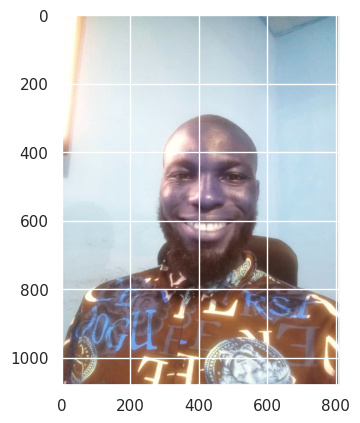

In [144]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

image_path = '/kaggle/input/sample-image-data/test_image.jpg'

def process_image_sample(image_path):
    img = cv.imread(image_path)
    plt.imshow(img)
    resize_image = cv.resize(img, (48, 48))
    print(resize_image.shape)
    return np.expand_dims(resize_image, 0)

sample_img = process_image_sample(image_path)
sample_img

In [ ]:
# np.expand_dims(sample_img, 0).shape

In [ ]:
print('hello')

In [145]:
label_converter

{0: 'angry', 1: 'disgusted', 2: 'happy', 3: 'sad', 4: 'surprised'}

In [146]:
from tensorflow.keras.models import load_model
import os 


def load_faceemotion_model(): 
    root_path = '/kaggle/working/'
    face_emo_path = os.path.join(root_path, 'face_emo_model.h5')
    face_emo_model = load_model(face_emo_path)
    face_emo_model.compile( optimizer='adam',  loss='sparse_categorical_crossentropy',  metrics=['accuracy'])
    return face_emo_model

face_model = load_faceemotion_model()

def make_face_emo_prediction(model, image):
    prediction = model.predict(image)
    print(prediction)
    predict = [np.argmax(pre) for pre in prediction]
    emo = label_converter[predict[0]]
    return (predict, emo)
    

make_face_emo_prediction(face_model, sample_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
[[2.2656724e-14 7.5799214e-08 9.7036642e-01 4.9149168e-01 1.0513778e-09]]


([2], 'happy')

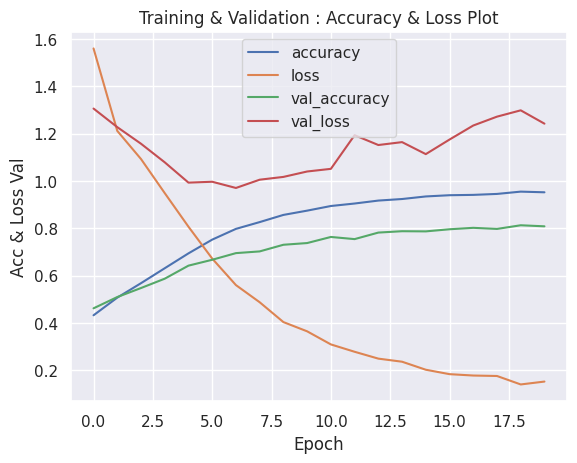

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
history = fed_model.history.history

pd.DataFrame(fed_history.history).plot()
plt.title('VGG16 Training & Validation : Accuracy & Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Acc & Loss Val')
plt.show()

 14/438 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step 

W0000 00:00:1727203354.886405     254 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      2379
           1       0.78      0.77      0.77      2479
           2       0.80      0.90      0.85      4354
           3       0.82      0.74      0.78      2851
           4       0.85      0.87      0.86      1922

    accuracy                           0.81     13985
   macro avg       0.81      0.80      0.80     13985
weighted avg       0.81      0.81      0.81     13985

Axes(0.125,0.11;0.62x0.77)
==================  ALL CLASS REPORT ==================
0.8082946013585985
0.8088169813900492
0.8082946013585985
0.8066356687655268


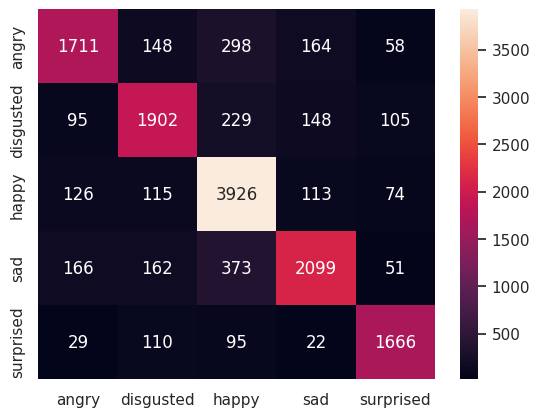

In [148]:
from sklearn.metrics import classification_report, confusion_matrix

prediction = fed_model.predict(X_test)
final_pred = [np.argmax(pre) for pre in prediction]

# classification report 
face_report = classification_report(y_test, final_pred)
face_conf = confusion_matrix(y_test, final_pred)
face_acc = accuracy_score(y_test, final_pred)
face_precision = precision_score(y_test, final_pred, average='weighted')
face_recall = recall_score(y_test, final_pred, average='weighted')
face_f1_score  = f1_score(y_test, final_pred, average='weighted')


print(face_report)
print(sn.heatmap(face_conf, fmt='d', annot=True, xticklabels=label_converter.values(), yticklabels=label_converter.values()))

print('==================  ALL CLASS REPORT ==================')
print(face_acc)
print(face_precision)
print(face_recall)
print(face_f1_score)

In [ ]:
# fed_history.history
d

In [ ]:
# Facial Emotion model usage....  
import numpy as np 

d = np.array([2,3,4,5,6,6,7,8])
np.sum(d == 6)

2

In [39]:
import os 
import pathlib
import cv2 as cv

win_url = pathlib.Path('emotion_image/')
win_url

images = list(win_url.glob('angry/*.png'))
sample = str(images[0])
sample

'emotion_image\\angry\\im0.png'

In [ ]:
from captcha.image import ImageCaptcha

# Create an ImageCaptcha instance with optional custom fonts and size
image = ImageCaptcha(width=280, height=90, )

captcha_text = "Anger"
data = image.generate(captcha_text, )
image.write(captcha_text, 'sample.png')